In [1]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os 

In [0]:
os.chdir('/drive/My Drive/hackathon_deep_learning')

In [4]:

os.getcwd()

'/drive/My Drive/hackathon_deep_learning'

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('hackathon_images_train.csv')

In [0]:
test = pd.read_csv('hackathon_images_test.csv')

In [8]:
train.head()

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Faces_easy,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,airplanes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,Leopards,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,6.0,2.0,3.0,0.0,2.0,2.0,...,18.0,24.0,24.0,19.0,24.0,15.0,20.0,16.0,22.0,16.0,25.0,18.0,20.0,25.0,26.0,21.0,22.0,20.0,23.0,18.0,20.0,21.0,17.0,22.0,16.0,22.0,12.0,14.0,19.0,18.0,17.0,18.0,13.0,17.0,19.0,14.0,20.0,11.0,2.0,5.0
4,Faces,125.0,123.0,123.0,120.0,120.0,116.0,114.0,114.0,115.0,99.0,63.0,183.0,185.0,188.0,191.0,197.0,199.0,193.0,195.0,203.0,202.0,205.0,208.0,210.0,209.0,209.0,210.0,217.0,217.0,218.0,217.0,220.0,221.0,219.0,214.0,213.0,209.0,218.0,223.0,...,193.0,190.0,192.0,195.0,185.0,189.0,187.0,171.0,187.0,187.0,196.0,187.0,186.0,173.0,183.0,183.0,172.0,180.0,181.0,175.0,173.0,172.0,169.0,166.0,164.0,152.0,140.0,135.0,84.0,86.0,104.0,123.0,123.0,102.0,139.0,116.0,100.0,112.0,118.0,139.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 10001 entries, Labels to pixels9999
dtypes: float64(10000), object(1)
memory usage: 127.5+ MB


In [0]:
x_train = train.drop('Labels',axis=1)

In [0]:
y_train = train.Labels

In [0]:
x_train = x_train.values

In [0]:
x_train = x_train.reshape(-1,100,100,1)

In [65]:
x_train.shape

(1671, 100, 100, 1)

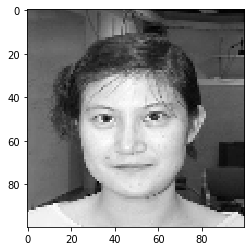

In [51]:
plt.imshow(x_train[0,:],cmap='gray')
plt.show()

In [46]:
x_train.shape

(1671, 100, 100, 1)

In [0]:
y_train.value_counts()

Motorbikes     488
airplanes      275
Faces          259
Faces_easy     255
watch          143
Leopards       117
bonsai          71
grand_piano     63
Name: Labels, dtype: int64

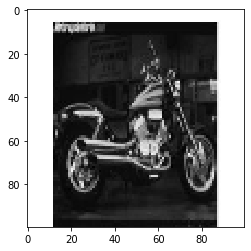

In [50]:
plt.imshow(x_train[2,:],cmap='gray')
plt.show()

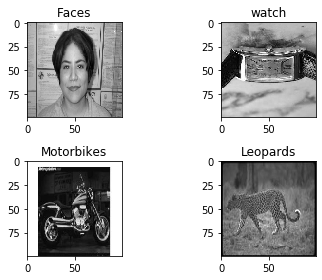

In [49]:
plt.subplot(221)

plt.imshow(x_train[4,:],cmap='gray')
plt.title(y_train[4])

plt.subplot(222)

plt.imshow(x_train[9,:],cmap='gray')
plt.title(y_train[9])

plt.subplot(223)

plt.imshow(x_train[2,:],cmap='gray')
plt.title(y_train[2])

plt.subplot(224)

plt.imshow(x_train[3,:],cmap='gray')
plt.title(y_train[3])

plt.tight_layout()

plt.show()


In [0]:
y = pd.get_dummies(y_train).values

In [53]:
y.shape

(1671, 8)

## Normalizing

In [0]:
x_train_norm = x_train/255.

In [67]:
x_train_norm.shape

(1671, 100, 100, 1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_x,valid_x,train_label,valid_label = train_test_split(x_train_norm,y,test_size=0.2,random_state=1)

In [70]:
print(train_x.shape,valid_x.shape,train_label.shape,valid_label.shape)

(1336, 100, 100, 1) (335, 100, 100, 1) (1336, 8) (335, 8)


## Convolutional Neural Network

In [0]:
import keras 
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dropout

In [0]:
batch_size = 50
epochs = 100
num_classes = 8 

In [0]:
model = Sequential()
#conv_1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(100,100,1),padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
#conv_2
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
#conv_3
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes,activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [75]:
model.fit(x_train_norm,y, batch_size=batch_size,epochs=10,verbose=1,validation_data=(valid_x,valid_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1671 samples, validate on 335 samples
Epoch 1/10





1671/1671 [==============================] - 42s 25ms/step - loss: 1.6947 - acc: 0.3555 - val_loss: 1.3985 - val_acc: 0.5134
Epoch 2/10
1671/1671 [==============================] - 40s 24ms/step - loss: 1.0148 - acc: 0.6248 - val_loss: 0.6961 - val_acc: 0.7821
Epoch 3/10
1671/1671 [==============================] - 40s 24ms/step - loss: 0.5522 - acc: 0.8121 - val_loss: 0.3658 - val_acc: 0.8866
Epoch 4/10
1671/1671 [==============================] - 40s 24ms/step - loss: 0.3303 - acc: 0.9031 - val_loss: 0.2743 - val_acc: 0.9284
Epoch 5/10
1671/1671 [==============================] - 40s 24ms/step - loss: 0.1944 - acc: 0.9414 - val_loss: 0.1362 - val_acc: 0.9672
Epoch 6/10
1671/1671 [==============================] - 40s 24ms/step - loss: 0.1138 - acc: 0.9641 - val_loss: 0.1356 - val_acc: 0.9761
Epoch 7/10
1671/1671 [=============

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Columns: 10001 entries, Labels to pixels9999
dtypes: float64(10000), object(1)
memory usage: 85.3+ MB


In [0]:
x_test = test.drop('Labels',axis=1).values

In [0]:
y_test = test.Labels

In [0]:
x_test  = x_test.reshape(-1,100,100,1)

In [80]:
x_test.shape

(1118, 100, 100, 1)

In [0]:
x_test = x_test/255.

In [0]:
y_test = pd.get_dummies(y_test).values

In [83]:
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [84]:
model.evaluate(x_test,y_test)

1118/1118 [==============================] - 6s 6ms/step


[0.16247950758191895, 0.9570661889845655]

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 128)      